In [6]:
import sys
import os
import matplotlib.pyplot as plt
import torch
import mlflow
import numpy as np
from PIL import Image
import cv2
from pathlib import Path
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [7]:
sys.path.append(os.path.abspath("../src"))

In [8]:
from dataset import BinaryDenoisingDataset
from model import BinaryDenoisingAutoencoder
from train import train_model
from evaluation import evaluate_model, visualize_binary_results

### Train Model

In [25]:
# Hyperparameters
batch_size = 32
learning_rate = 0.001
binary_threshold = 0.8  # Threshold for binary output
data_version = "20250406204110"

# Define transformations for input images
transform = transforms.Compose([
    transforms.Resize((724, 512)),
    transforms.ToTensor()
])

# Load data
# Replace with your actual directories
noisy_dir = Path(f"/Users/volpea/Documents/projects/document-generator-job/data/sampling/document_19/{data_version}/")
clean_dir = Path(f"/Users/volpea/Documents/projects/document-generator-job/data/labels/document_19/{data_version}/")

# Create datasets with binary targets
train_dataset = BinaryDenoisingDataset(
    noisy_dir=noisy_dir / "train", 
    clean_dir=clean_dir / "train", 
    transform=transform,
    convert_to_binary=True,
    threshold=binary_threshold
)

test_val_dataset = BinaryDenoisingDataset(
    noisy_dir=noisy_dir / "test", 
    clean_dir=clean_dir / "test", 
    transform=transform,
    convert_to_binary=True,
    threshold=binary_threshold
)

# Split into val/test
val_size = int(0.5 * len(test_val_dataset))
test_size = len(test_val_dataset) - val_size

val_dataset, test_dataset = torch.utils.data.random_split(
    test_val_dataset, [val_size, test_size]
)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=5, shuffle=True, num_workers=0)

# Initialize model
model = BinaryDenoisingAutoencoder(input_channels=3)

In [26]:
noisy_image = train_dataset[0][0]
clean_image = train_dataset[0][1]

In [28]:
clean_image.shape

torch.Size([1, 724, 512])

In [30]:
noisy_image.shape

torch.Size([3, 724, 512])

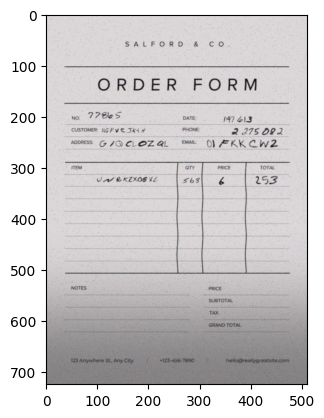

In [31]:
plt.imshow(noisy_image.numpy().transpose(1, 2, 0))
plt.show()

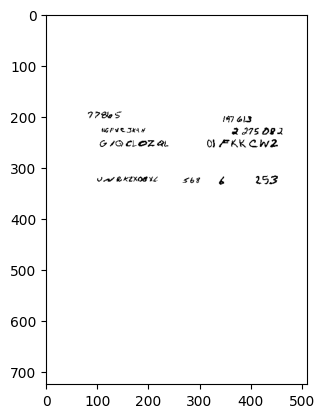

In [32]:
plt.imshow(clean_image.numpy().transpose(1, 2, 0), cmap="binary")
plt.show()

In [33]:
mlflow.set_tracking_uri("http://localhost:5000")

In [50]:
# Train model
model, train_losses, val_losses = train_model(
    model, train_loader, val_loader, num_epochs=25, learning_rate=learning_rate
)

Epoch [1/25], Train Loss: 0.1036, Val Loss: 0.0367


Python(92051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 09:29:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [2/25], Train Loss: 0.0262, Val Loss: 0.0213


Python(92447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 09:32:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [3/25], Train Loss: 0.0183, Val Loss: 0.0171


Python(92784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 09:35:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [4/25], Train Loss: 0.0155, Val Loss: 0.0153


Python(93117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 09:38:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [5/25], Train Loss: 0.0138, Val Loss: 0.0146


Python(93476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 09:40:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [6/25], Train Loss: 0.0129, Val Loss: 0.0136


Python(93780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 09:43:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [7/25], Train Loss: 0.0122, Val Loss: 0.0128


Python(94138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 09:46:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [8/25], Train Loss: 0.0118, Val Loss: 0.0125


Python(94471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 09:49:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [9/25], Train Loss: 0.0118, Val Loss: 0.0122


Python(94843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 09:51:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [10/25], Train Loss: 0.0113, Val Loss: 0.0120


Python(95207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 09:54:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [11/25], Train Loss: 0.0109, Val Loss: 0.0117


Python(95623) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 09:57:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [12/25], Train Loss: 0.0108, Val Loss: 0.0115


Python(95997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 10:00:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [13/25], Train Loss: 0.0108, Val Loss: 0.0119


Python(96309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 10:03:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [14/25], Train Loss: 0.0106, Val Loss: 0.0113


Python(96705) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 10:06:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [15/25], Train Loss: 0.0103, Val Loss: 0.0111


Python(97027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 10:08:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [16/25], Train Loss: 0.0102, Val Loss: 0.0110


Python(97407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 10:11:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [17/25], Train Loss: 0.0102, Val Loss: 0.0121


Python(98172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 10:14:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [18/25], Train Loss: 0.0102, Val Loss: 0.0109


Python(98589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 10:17:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [19/25], Train Loss: 0.0099, Val Loss: 0.0107


Python(99022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 10:20:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [20/25], Train Loss: 0.0098, Val Loss: 0.0106


Python(99363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 10:23:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [21/25], Train Loss: 0.0097, Val Loss: 0.0106


Python(99932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 10:25:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [22/25], Train Loss: 0.0096, Val Loss: 0.0105


Python(443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 10:28:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [23/25], Train Loss: 0.0096, Val Loss: 0.0104


Python(809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 10:31:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [24/25], Train Loss: 0.0095, Val Loss: 0.0103


Python(1263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 10:34:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Epoch [25/25], Train Loss: 0.0094, Val Loss: 0.0103


Python(1628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
2025/04/09 10:36:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run likeable-roo-301 at: http://localhost:5000/#/experiments/0/runs/8e138fe52aea48808bb2f8c4c07914c7
🧪 View experiment at: http://localhost:5000/#/experiments/0


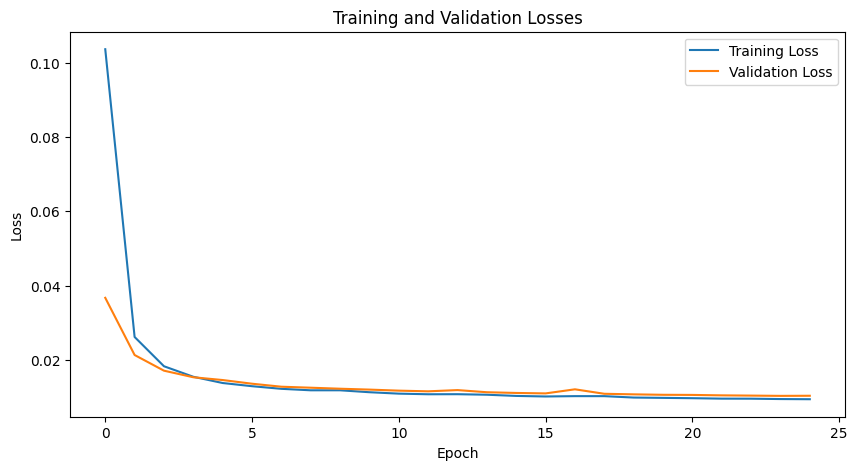

In [51]:
# Plot training/validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.savefig('binary_training_losses.png')
plt.show()

In [14]:
# Save model
torch.save(model.state_dict(), '../models/binary_denoising_model_2.pth')

### Evaluation

In [17]:
# Load Model
model.load_state_dict(torch.load("../models/binary_denoising_model_epoch_34.pth", map_location=torch.device('mps')))

/var/folders/qp/tq6vkghn11x18s4lfw_vf46w0000gn/T/ipykernel_12877/3538780663.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("../models/b

TypeError: Expected state_dict to be dict-like, got <class 'model.BinaryDenoisingAutoencoder'>.

In [13]:
# Inference after loading the logged model
run_id = "72a1dd5327e6444b98a3b5f0c98b6015"
model_uri = f"runs:/{run_id}/model_epoch_41"
model = mlflow.pytorch.load_model(model_uri)

/Users/volpea/.local/pipx/venvs/notebook/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


using_device: mps
Test Loss: 0.0091, Test Accuracy: 0.9950


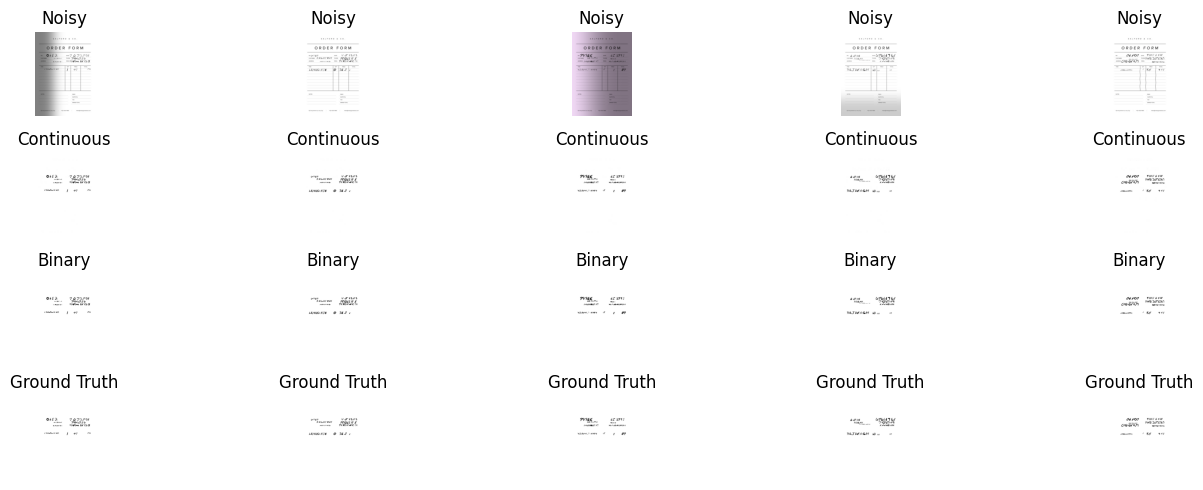

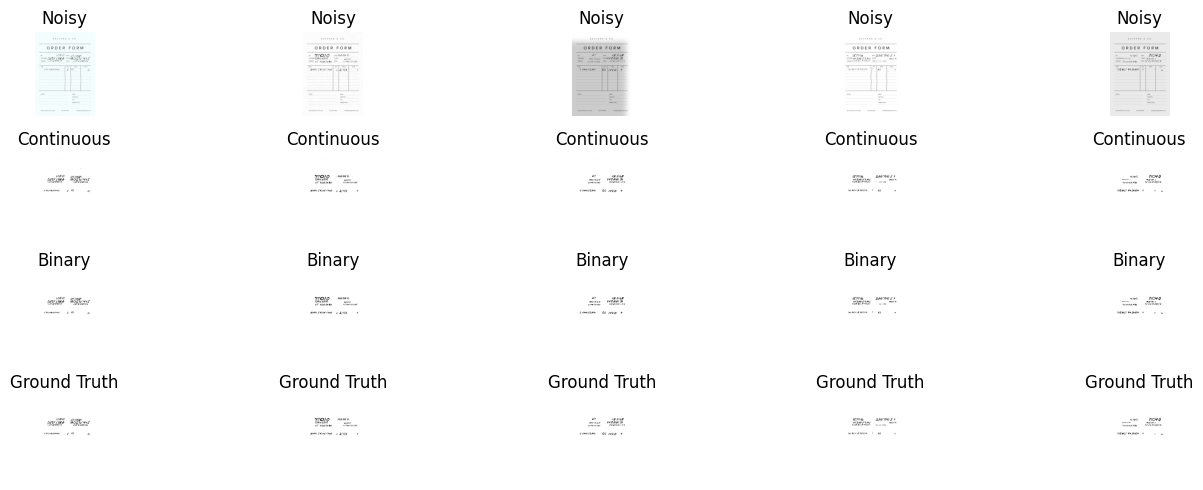

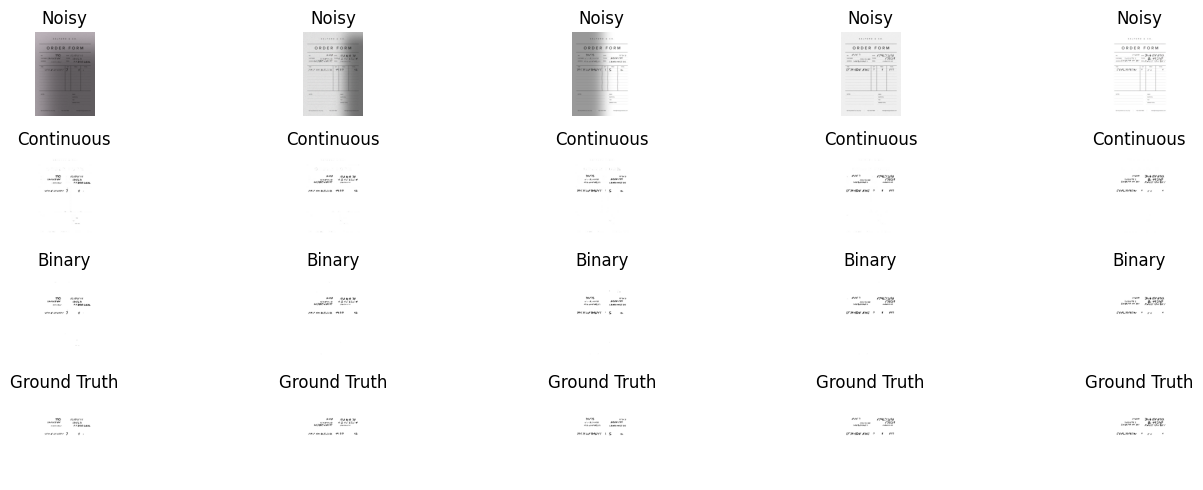

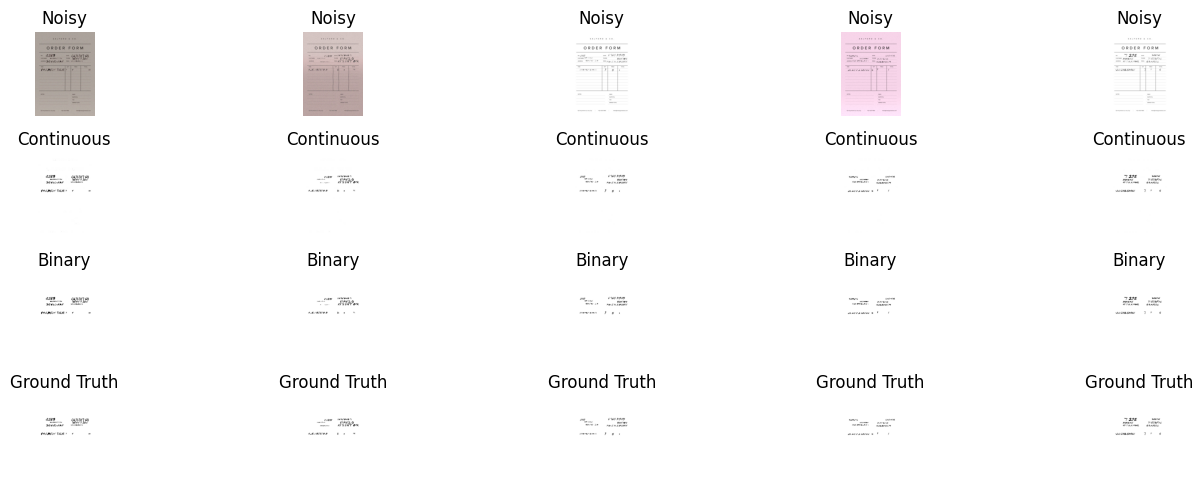

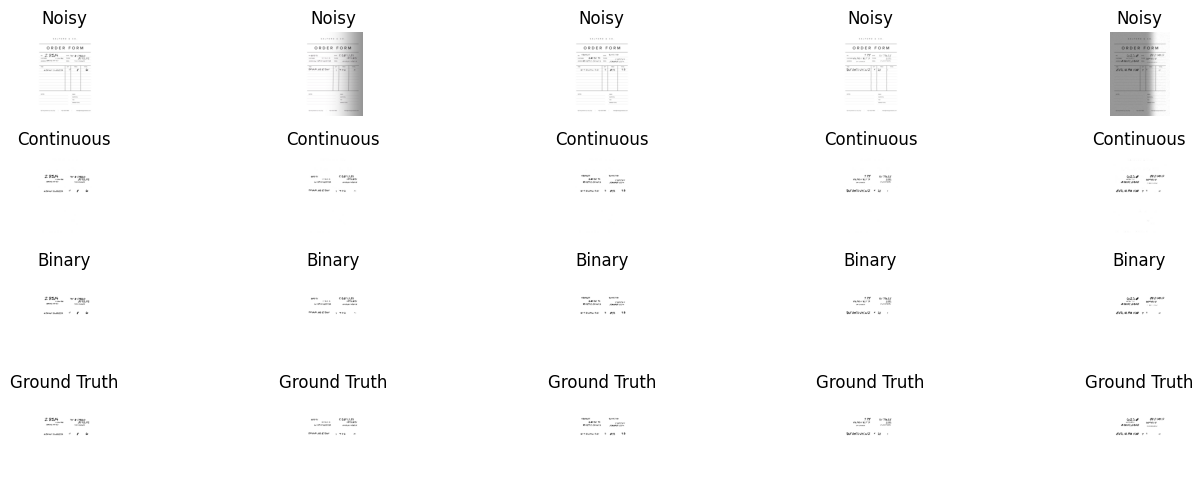

In [52]:
# Evaluate model
test_loss, test_accuracy = evaluate_model(model, test_loader, threshold=binary_threshold)

# Visualize results
visualize_binary_results(model, test_loader, threshold=0.5)

In [53]:
def predict_image(noisy_image, model):
    device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.mps.is_available() else "cpu")
    model = model.to(device)
    model.eval()
    
    noisy_image = noisy_image.to(device)
    
    with torch.no_grad():
        prediction = model(noisy_image)

    return prediction.cpu().numpy()

In [54]:
noisy_image = test_loader.dataset[8][0]

In [55]:
predicted_image = predict_image(noisy_image, model)

In [56]:
predicted_image_binary = (predicted_image > 0.5)

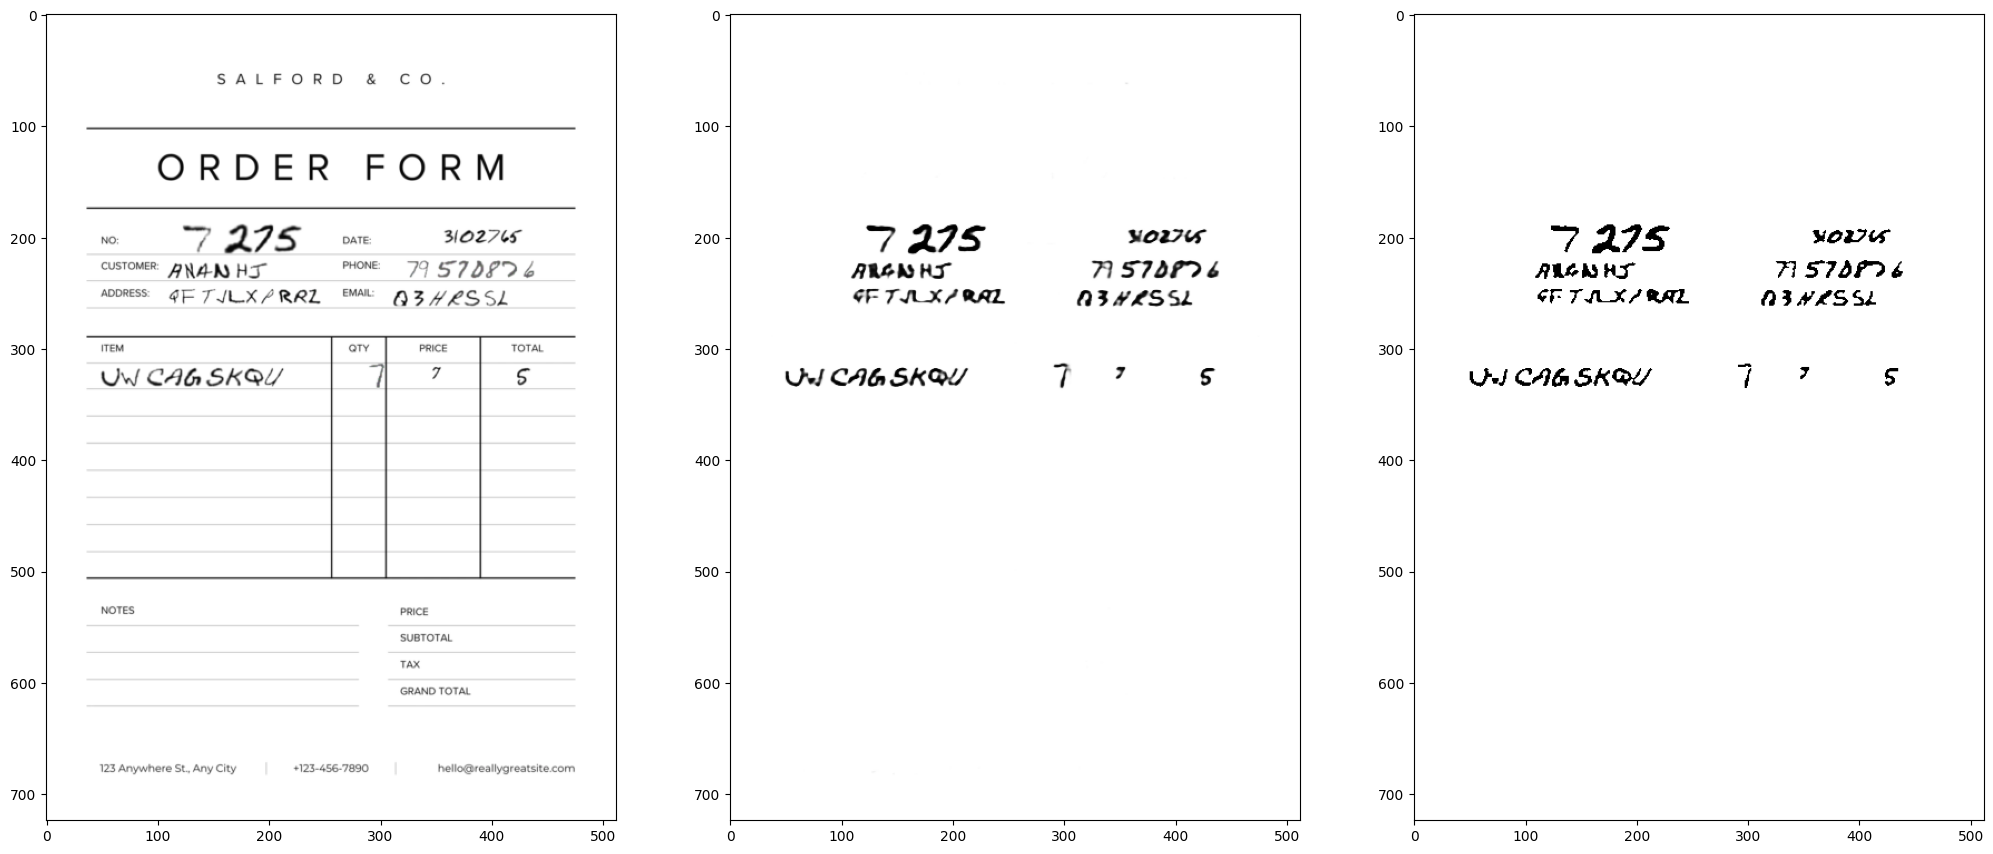

In [57]:
fig, ax = plt.subplots(ncols=3, figsize=(25, 15))
ax[0].imshow(noisy_image.numpy().transpose(1, 2, 0))
ax[1].imshow(1 - predicted_image[0], cmap="gray", vmin=0, vmax=1)
ax[2].imshow(predicted_image_binary[0], cmap="binary")
plt.show()

### Test Real Image

In [58]:
def align_to_template(image, template):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    orb = cv2.SIFT_create(500)
    keypoints1, descriptors1 = orb.detectAndCompute(image_gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(template_gray, None)

    # Match features.
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_SL2)
    matches = matcher.match(descriptors1, descriptors2, None)

    # Sort matches by score
    matches = sorted(matches, key=lambda x: x.distance, reverse=False)

    # Remove not so good matches
    num_good_matches = int(len(matches) * 0.15)
    matches = matches[:num_good_matches]

    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)

    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Find homography
    h, _ = cv2.findHomography(points1, points2, cv2.RANSAC)

    # Use homography
    height, width = template_gray.shape
    registered_image = cv2.warpPerspective(image, h, (width, height))

    return registered_image

In [59]:
image = cv2.imread("/Users/volpea/Documents/projects/document-generator-job/data/test/example_form_real_1.jpg")
template = cv2.imread("/Users/volpea/Documents/projects/document-generator-text-extractor/data/templates/example_form_template.webp")

In [60]:
registered_image = align_to_template(image, template)

In [61]:
registered_image = Image.fromarray(cv2.cvtColor(registered_image, cv2.COLOR_BGR2RGB))

In [62]:
input_image = transform(registered_image)

In [63]:
predicted_image = predict_image(input_image, model)

In [64]:
predicted_image_binary = (predicted_image > 0.5)

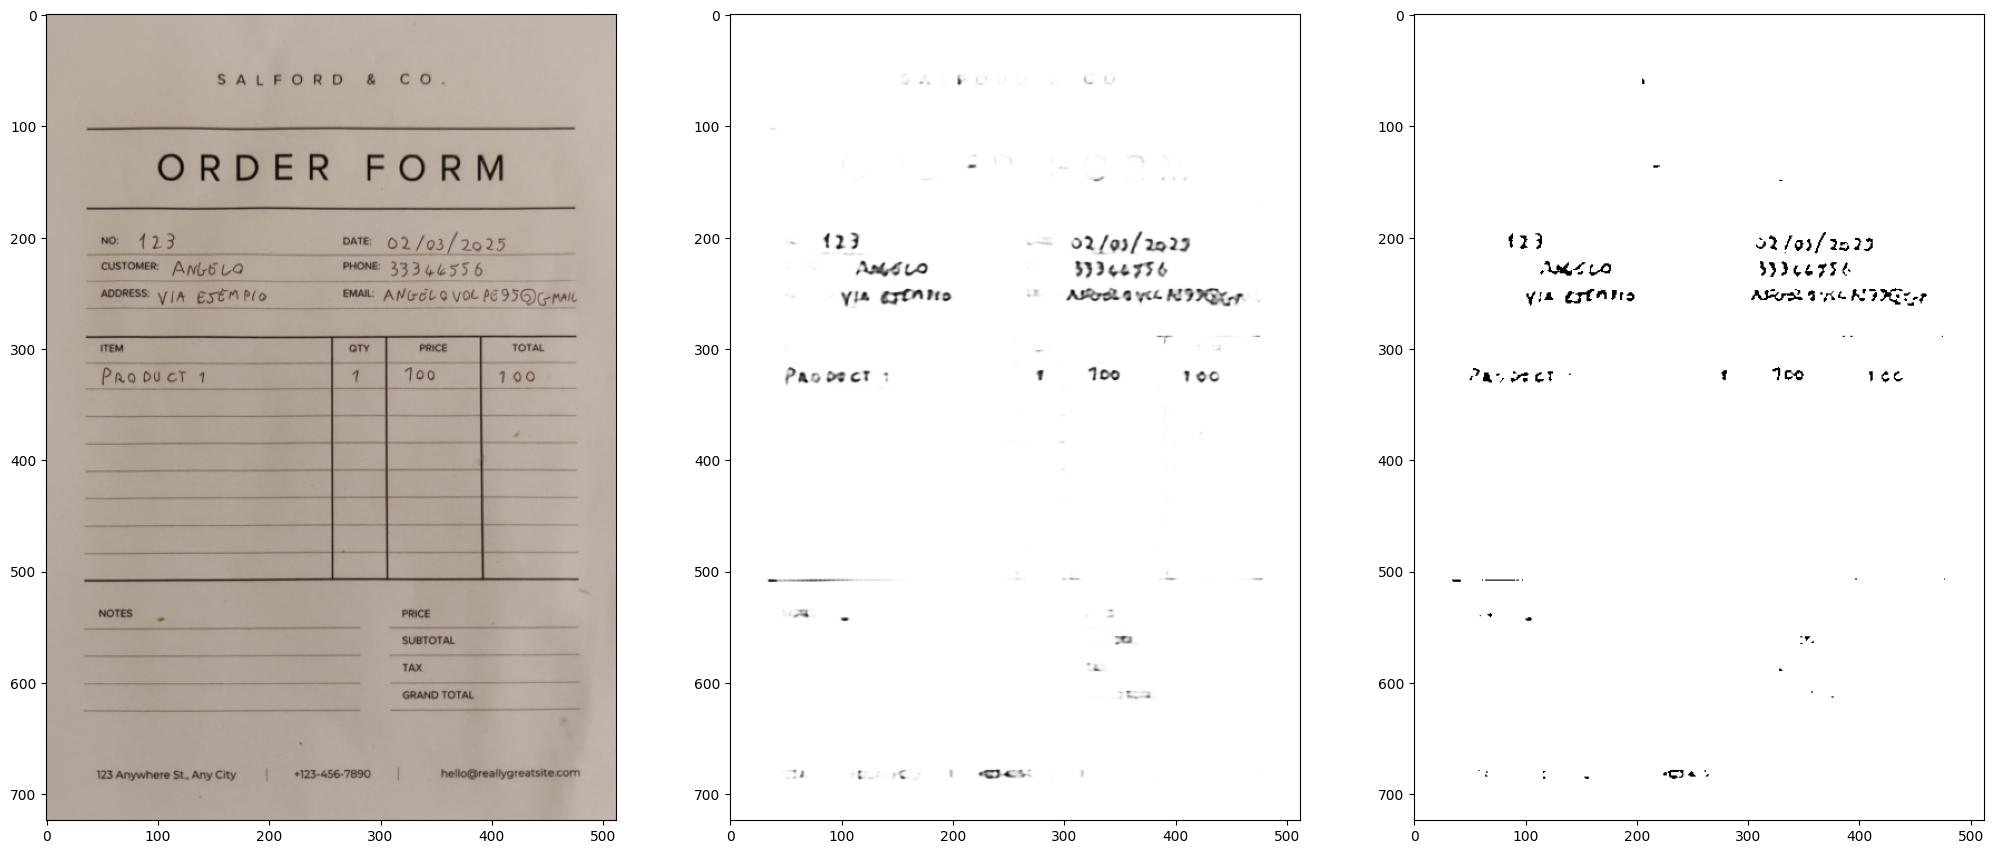

In [65]:
fig, ax = plt.subplots(ncols=3, figsize=(25, 15))
ax[0].imshow(input_image.numpy().transpose(1, 2, 0))
ax[1].imshow(1 - predicted_image[0], cmap="gray", vmin=0, vmax=1)
ax[2].imshow(predicted_image_binary[0], cmap="binary")
plt.show()

### OCR